# Grama Basics

*Purpose*: 


## Setup


In [1]:
import grama as gr
DF = gr.Intention()

# Grama Verbs

### TODO

![Verb classes](./images/verb-classes.png)


## Verb Classes

### TODO

| Class | Prefix | In | Out |
|-------|--------|----|-----|
| Transform | `tf_*` | `df` | `df` |
| Composition | `cp_*` | `md` | `md` |
| Fitting | `ft_*` | `df` | `md` |
| Evaluation | `ev_*` | `md` | `df` |


# Working with (Grama) models


In [2]:
from grama.models import make_cantilever_beam
md_beam = make_cantilever_beam()

## Model summary

### TODO


### __qX__ Inspect a model summary

Printing the model gives a high-level summary of the model. Run the code below, and answer the questions under *observations* below.


In [3]:
# TASK: No need to edit; run and inspect
md_beam

model: Cantilever Beam

  inputs:
    var_det:
      w: [2, 4]
      t: [2, 4]

    var_rand:
      H: (+1) norm, {'loc': 500.0, 'scale': 100.0}
      V: (+1) norm, {'loc': 1000.0, 'scale': 100.0}
      E: (+0) norm, {'loc': 29000000.0, 'scale': 1450000.0}
      Y: (-1) norm, {'loc': 40000.0, 'scale': 2000.0}

    copula:
      Independence copula

  functions:
      cross-sectional area: ['w', 't'] -> ['c_area']
      limit state: stress: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_stress']
      limit state: displacement: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_disp']

*Observations*

<!-- task-begin -->
- What variables `var` does the model have?
  - (Your response here)
- Which variables are deterministic `det`?
  - (Your response here)
- Which variables are random `rand`?
  - (Your response here)
- What functions does the model have?
  - (Your response here)
- What outputs do those functions provide?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- What variables `var` does the model have?
  - t, w, H, V, E, Y
- Which variables are deterministic `det`?
  - t, w
- Which variables are random `rand`?
  - H, V, E, Y
- What functions does the model have?
  - cross-sectional area, limit state: stress, limit state: displacement
- What outputs do those functions provide?
  - c_area, g_stress, g_disp
<!-- solution-end -->

## Importance of context

### TODO

| Symb. | I/O | Meaning | Units |
|-------|-----|---------|-------|
| `t`   | Input | Beam cross-section height | in |
| `w`   | Input | Beam cross-section width  | in |
| `H`   | Input | Tip horizontal force      | lbf |
| `V`   | Input | Tip vertical force        | lbf |
| `E`   | Input | Elasticity                | psi |
| `Y`   | Input | Yield strength            | psi |
|-------|------|---------------------------|-----|
| `c_area` | Output | Beam cross-section area | in^2 |
| `g_stress` | Output | Stress failure criterion | (-) |
| `g_disp` | Output | Displacement failure criterion | in |



## Generate data from a model

### TODO


### __qX__ (Sinews)


In [5]:
# TASK:
(
    md_beam
    >> gr.ev_sinews(df_det="nom")
)

,Y,H,V,E,sweep_var,sweep_ind,w,t,g_stress,c_area,g_disp
0,37940.417892,267.365213,1063.529507,2.922759e+07,H,0,3.0,3.0,0.209124,9.0,0.400656
1,37940.417892,377.935965,1063.529507,2.922759e+07,H,0,3.0,3.0,0.147696,9.0,0.346482
2,37940.417892,423.529033,1063.529507,2.922759e+07,H,0,3.0,3.0,0.122367,9.0,0.319325
3,37940.417892,456.927270,1063.529507,2.922759e+07,H,0,3.0,3.0,0.103812,9.0,0.297745
4,37940.417892,486.028970,1063.529507,2.922759e+07,H,0,3.0,3.0,0.087645,9.0,0.277818
...,...,...,...,...,...,...,...,...,...,...,...
115,40279.420598,445.068739,854.533772,2.825705e+07,Y,2,3.0,3.0,0.284984,9.0,0.569680
116,40861.454599,445.068739,854.533772,2.825705e+07,Y,2,3.0,3.0,0.299535,9.0,0.569680
117,41529.419348,445.068739,854.533772,2.825705e+07,Y,2,3.0,3.0,0.316234,9.0,0.569680
118,42441.280698,445.068739,854.533772,2.825705e+07,Y,2,3.0,3.0,0.339031,9.0,0.569680


*Observations*

### TODO

<!-- task-begin -->
- Do any inputs affect the output `c_area`? What about `w` or `t`? How do you know? (Or *not* know?)
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
<!-- solution-end -->

## Visualize the data from the model

### TODO


### __qX__ (Sinews)


Calling plot_sinew_outputs....


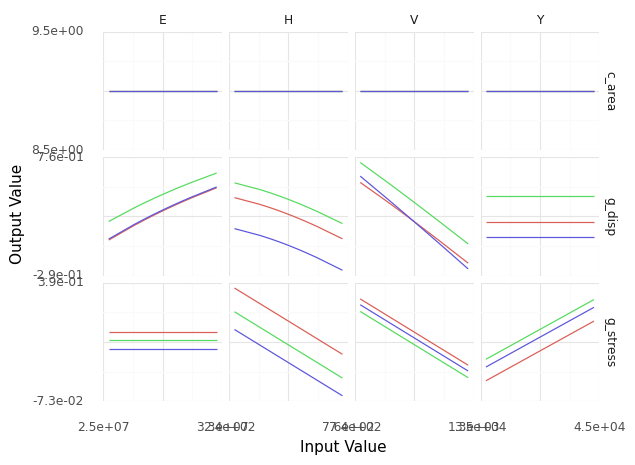

<ggplot: (8769939529798)>

In [6]:
# TASK:
(
    md_beam
    >> gr.ev_sinews(df_det="nom")
    >> gr.pt_auto()
)

*Observations*

<!-- task-begin -->
- Do any inputs affect the output `c_area`? What about `w` or `t`? How do you know? (Or *not* know?)
  - (Your response here)
- Does the input `Y` affect the output `g_disp`? How do you know?
  - (Your response here)
- Does the input `E` increase or decrease `g_disp`?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Do any inputs affect the output `c_area`? What about `w` or `t`? How do you know? (Or *not* know?)
  - None of the inputs visualized have any effect on `c_area`. The inputs `w` and `t` have an effect on `c_area`, but we can't tell based on this plot. I know this because `c_area = w * t` is the cross-sectional area of the beam.
- Does the input `Y` affect the output `g_disp`? How do you know?
  - The input `Y` has no effect on `g_disp`; it has zero slope.
- Does the input `E` increase or decrease `g_disp`?
  - The input `E` tends to increase `g_disp`.
<!-- solution-end -->

# Where this course is going

### TODO


## Building models with grama

### TODO


## Generating and wrangling data

### TODO


## Visualizing data

### TODO


## Statistics

### TODO
